## Analyzing Uber pickups data from NYC using time series models
In this lab, you will start with Uber pickups data from NYC for January to June 2015. After some exploratory data analysis to understand the features of this data set, you will build a seasonal ARIMA model and a Prophet model to forecast demand for pickups.

In [3]:
import pandas as pd
import numpy as np
import datetime
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10

## Read the data

In [26]:
# create path to 2015 uber-pickup data (remember to unzip the data first)

df15 = pd.read_csv('uber-raw-data-janjune-15.csv')

## Exploratory Data Analysis: Group pickups by date + hour

- convert Pickup_date field into pandas datetime format (pd.to_datetime())
- order dataframe chronologically
- build two new columns: date and hour by extracting these from the converted Pickup_date field
- Group data by date and hour and 
- for each hour, calculate the number of pickups.
- plot the data (date, hour on x-axis, pickup counts on y)

Here is what your plot should look like

In [27]:
df15['Pickup_date'] = pd.to_datetime(df15['Pickup_date'])


In [28]:
df15 = df15.set_index('Pickup_date')
df15

,Dispatching_base_num,Affiliated_base_num,locationID
Pickup_date,,,
2015-05-17 09:47:00,B02617,B02617,141
2015-05-17 09:47:00,B02617,B02617,65
2015-05-17 09:47:00,B02617,B02617,100
2015-05-17 09:47:00,B02617,B02774,80
2015-05-17 09:47:00,B02617,B02617,90
2015-05-17 09:47:00,B02617,B02617,228
2015-05-17 09:47:00,B02617,B02617,7
2015-05-17 09:47:00,B02617,B02764,74
2015-05-17 09:47:00,B02617,B02617,249


In [18]:
df15['count'] = 1
new_df = df15.resample('H').count()
new_df

,Dispatching_base_num,Affiliated_base_num,locationID,count
Pickup_date,,,,
2015-01-01 00:00:00,6465,6162,6465,6465
2015-01-01 01:00:00,6001,5744,6001,6001
2015-01-01 02:00:00,7171,6838,7171,7171
2015-01-01 03:00:00,5874,5620,5874,5874
2015-01-01 04:00:00,3529,3376,3529,3529
2015-01-01 05:00:00,1766,1680,1766,1766
2015-01-01 06:00:00,1067,1028,1067,1067
2015-01-01 07:00:00,642,631,642,642
2015-01-01 08:00:00,565,548,565,565


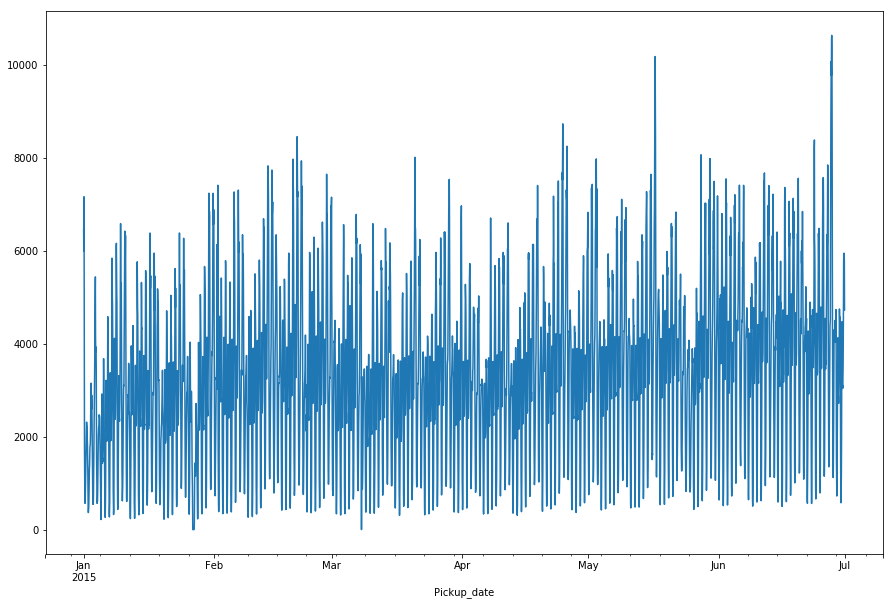

In [19]:
new_df['count'].plot()

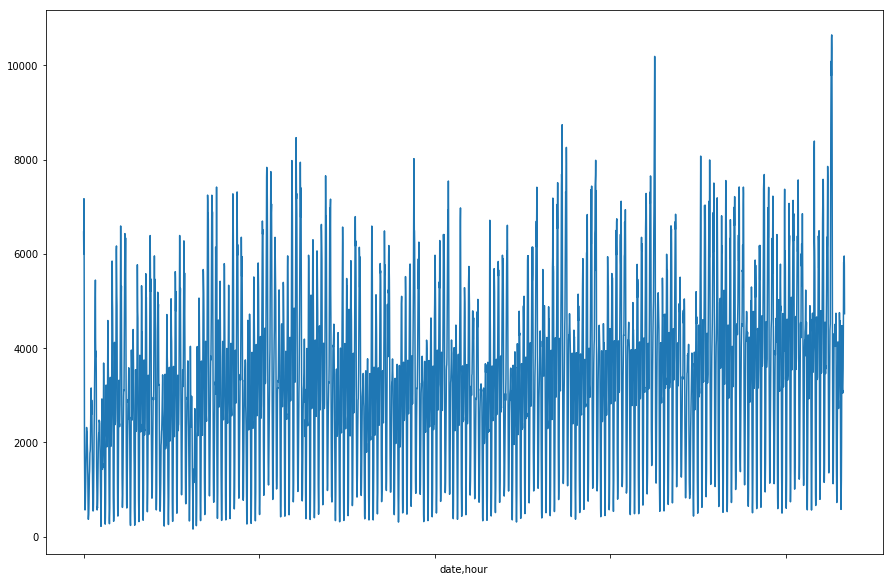

In [ ]:
# your code here

## Obervations about the plot
- enter your observations about the plot above here.
- There seems to be a wide variation of uber pickups within every month and throughout the year. Overall, it seems there is a slight positive increase, perhaps due to increasing popularity of the service. The end of May and June see particularly significant spikes.


## Split time series into train/test
For 2015, there we have data for 6 months, Jan-June. We will split it up as follows:

Training set: January to May (5 months)
Test set: June (1 month)

In [90]:
# your code here to create two new dataframes df15_train and df15_test as specified above.
df15_train = new_df.loc[new_df.index < '2015-06-01 00:00:00', 'count']
df15_test = new_df.loc[new_df.index >= '2015-06-01 00:00:00', 'count']

train = new_df.loc[new_df.index < '2015-06-01 00:00:00', 'count']
test = new_df.loc[new_df.index >= '2015-06-01 00:00:00', 'count']

## Examining monthly trends: trends for April 2015
We will select data from April 2015 in df15_train. Then group by date and hour, and count number of pickups for each (date,hour) and plot it.

Here is what your plot will look like:

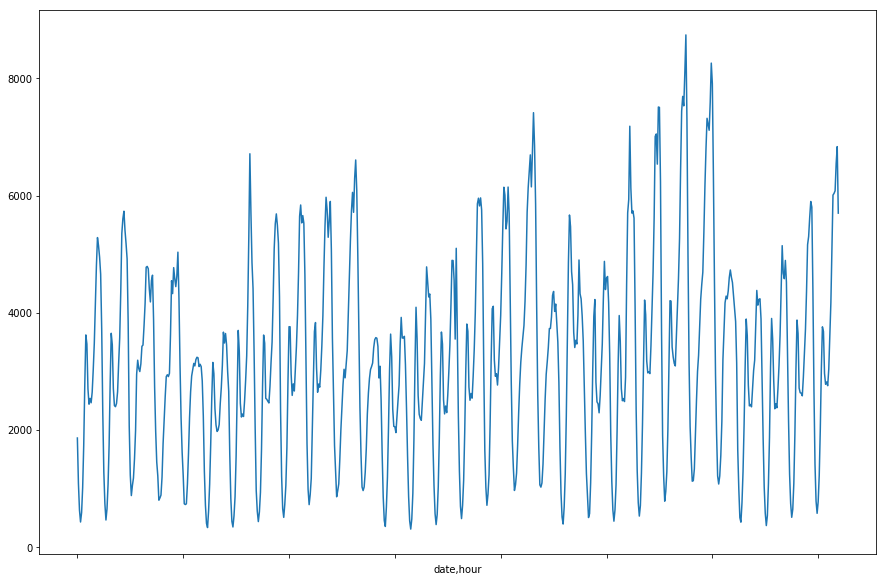

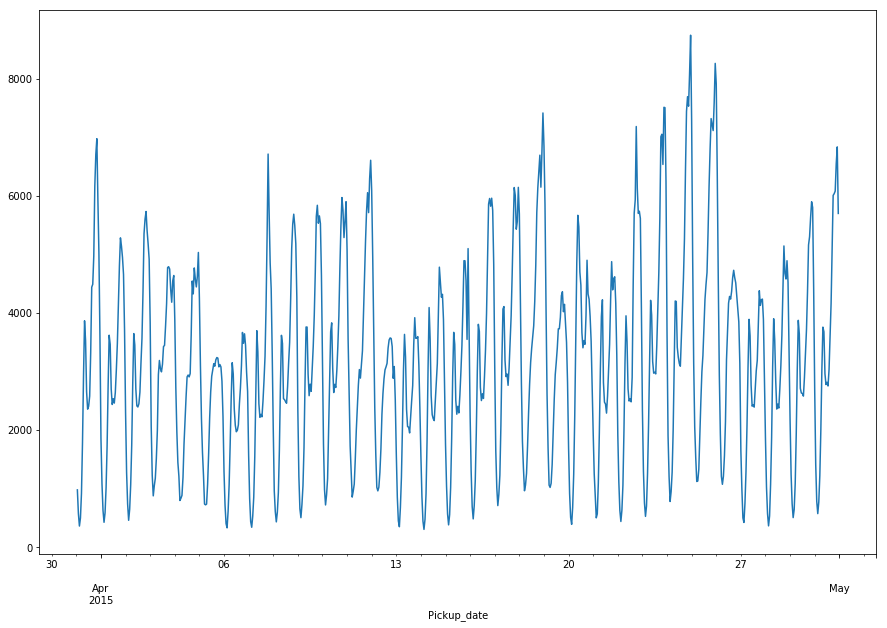

In [47]:
# your code to visualize pickups for April 2015
monthly = new_df.loc[(new_df.index > '2015-03-31 00:00:00') & (new_df.index < '2015-05-01 00:00:00'), 'count']
monthly.plot()

## Observations on the monthly trend plot
- enter your observations on the plot above
- There is again a wide variation among the days of the month. It's hard to tell without a bar plot exactly what days see the most usage. There seems to be an uptick in the latter part of the month, but it might be insignificant.

## Hourly trends
We will look at hourly trends in the data for one specific day -- 2015-04-02.
Select data for that date, group by hour and count the number of pickups for each hour, then plot it. Here is what your plot will look like.

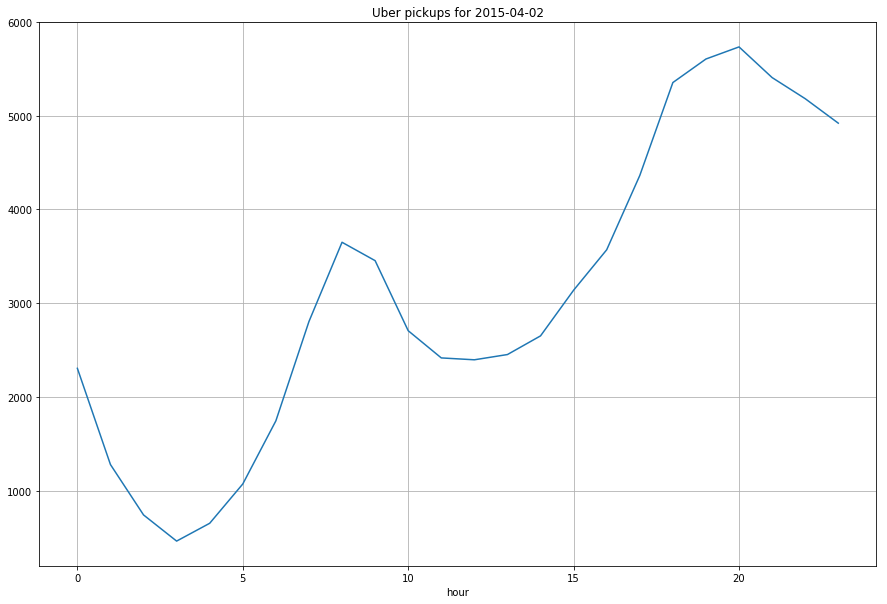

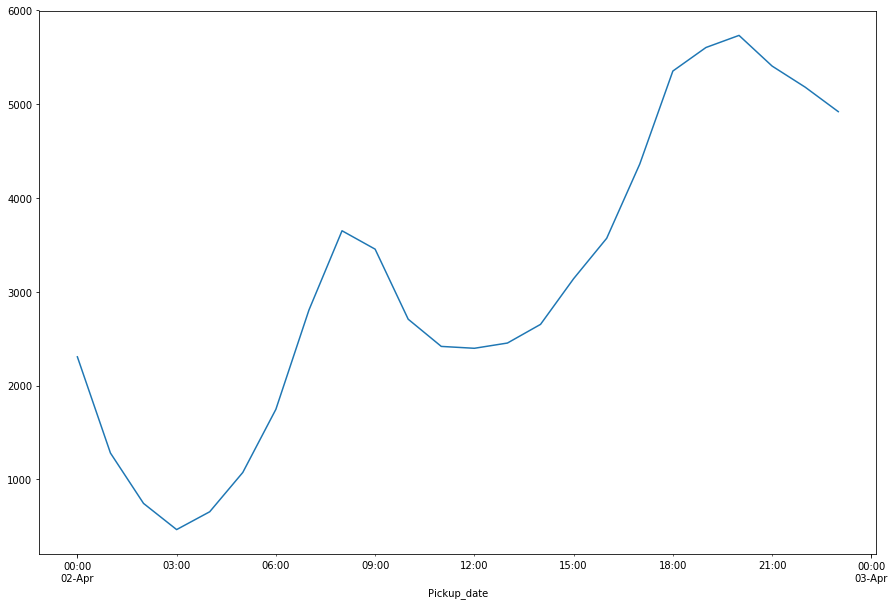

In [48]:
# your code for plotting hourly trends
# your code to visualize pickups for April 2015
hourly = new_df.loc[(new_df.index > '2015-04-01 23:59:00') & (new_df.index < '2015-04-03 00:00:00'), 'count']
hourly.plot()

## Observations on the hourly trend plot
- enter your observations on the plot above.
- This plot is the easiest to interpret of the lot. There are obvious spikes on the graph. There is a spike before 9 AM in the early morning, which is probably due to people needing rides before work. There's another spike in the evening. This makes sense because there is the most use of cars in the evening for activities or for post work stuff.

## Hourly trends for day of the week
- add a new column to df15_train called 'weekday' by calling .date.weekday() on the 'date' field
- group the data by weekday and hour and count pickups for each (weekday, hour)
- plot 7 curves, one for each day, with hour on the x-axis and count of pickups at that hour on the y-axis

Here is what your plot will look like

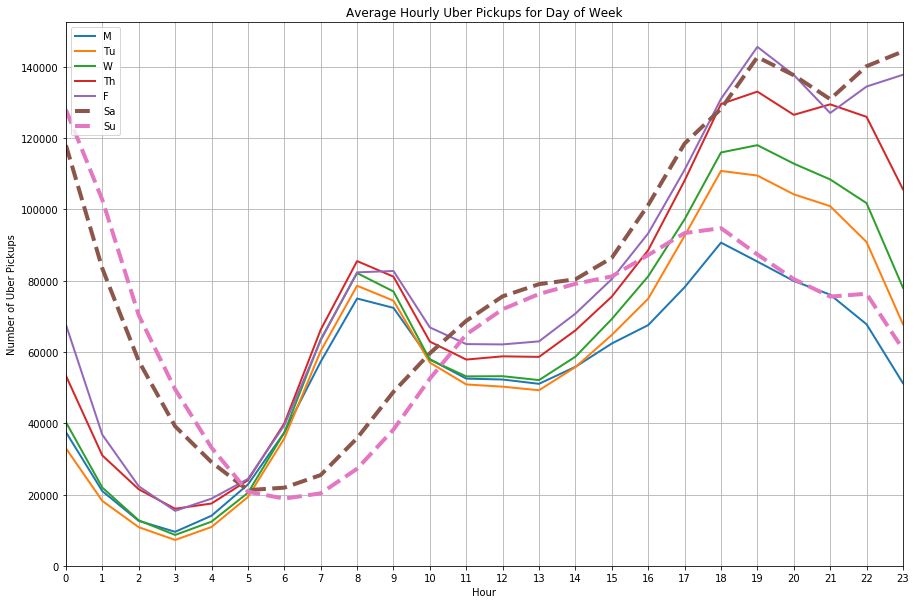

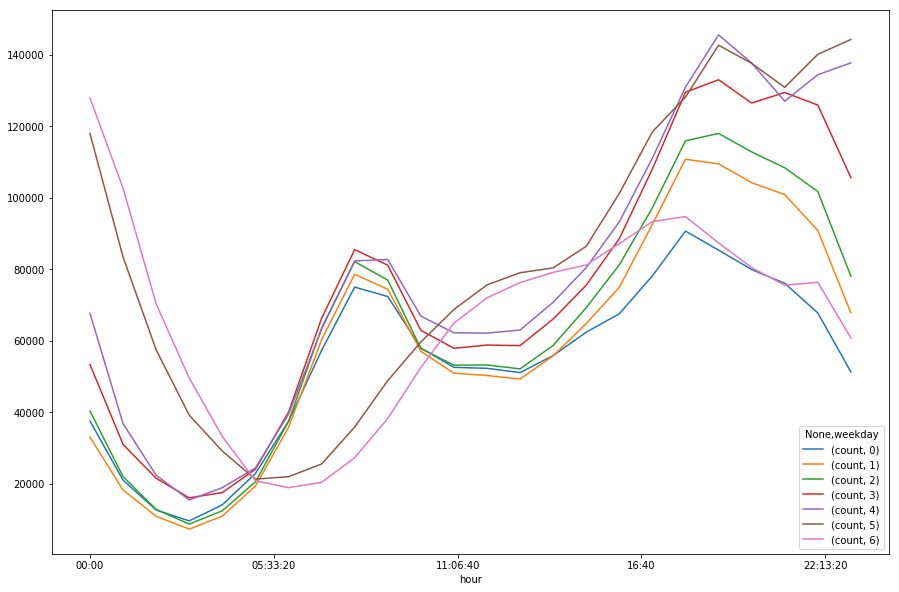

In [73]:
# your code for visualizing hourly trends as a function of the day of the week
train = pd.DataFrame(train)
train['weekday'] = train.index.dayofweek
train['hour'] = train.index.time

train.groupby(['hour','weekday']).sum().unstack().plot()

## Observations on hourly trends by day of week
- enter your observations from the plot above.
- It is very clear which lines represent the weekdays because they're all grouped together and have the same sort of pattern. However the two weekends Saturday and Sunday are very distinct and have a different structure than the other days on the graph. Although Saturday and Sunday start out similarly, they diverge towards the end of the day. Sunday seems to take more of a weekday like and which makes sense because there is a business day the following day. However Saturday seems to branch off like more of a weekend or like a Friday.

## Stationarization
Before we can use this data to forecast the future, we have to test its stationarity. We plot a rolling mean, standard deviation, and statistics from the Adjusted Dickey-Fuller Test.

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, rolling=24):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window = rolling).mean()
    rolstd = timeseries.rolling(window = rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,5))
    orig = plt.plot(timeseries, color='darkgray',label='Original')
    mean = plt.plot(rolmean, color='darkblue', label='Rolling Mean', lw=1)
    std = plt.plot(rolstd, color='red', label = 'Rolling Std', lw=1)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel('Differenced # of Uber Pickups\nx(t) - x(t-1)')
    plt.xlim(timeseries.index.min(), timeseries.index.max())
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries)
    print('> ADF Statistic: {:.3f}'.format(result[0]))
    print('> p-value: {:.3e}'.format(result[1]))
    print('> Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

## Stationarity test on training data
- group the training data in df15_train by date and hour and count pickups in each group
- call the test_stationarity function on this data (data/hour, number of pickups) with a rolling window of 168 (7 days)

You should get a plot like this:
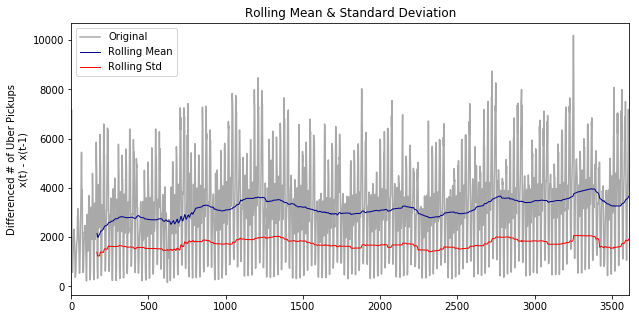

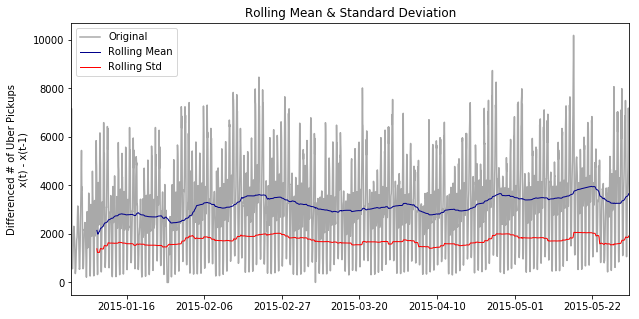

Results of Dickey-Fuller Test:
> ADF Statistic: -5.810
> p-value: 4.429e-07
> Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [77]:
# your code for stationarity
test_stationarity(df15_train, rolling=168)

## Stationarity test on differenced training data
Even with the raw training data, you should see a significantly negative ADF statistic and near-zero p-value - this means our timeseries is already quite stationary.

However, we can still move forward with differencing to improve the already high stationarity. You should get a plot like this:

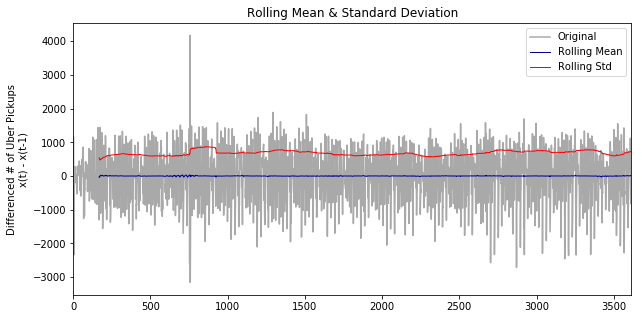

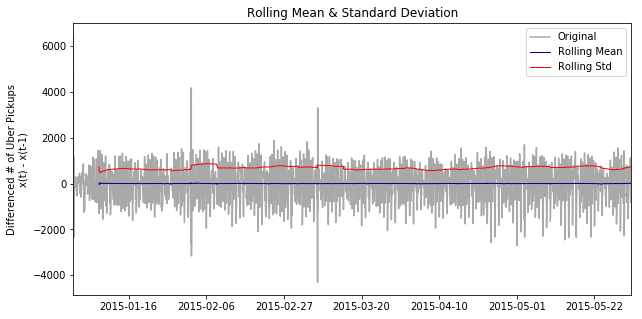

Results of Dickey-Fuller Test:
> ADF Statistic: -15.499
> p-value: 2.432e-28
> Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [79]:
# your code for testing stationarity of first difference of training data
test_stationarity(df15_train.diff().fillna(df15_train), rolling=168)

## 1st order + seasonal differencing
Since we know from previous plots that our data has a strong cyclical component to it of 1 week, we can try to difference the previous week's data to see if stationarity improves further.
Compute difference with time period of 168 (7 x 24 hours).

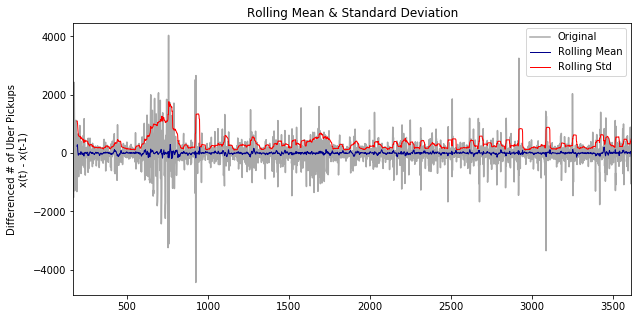

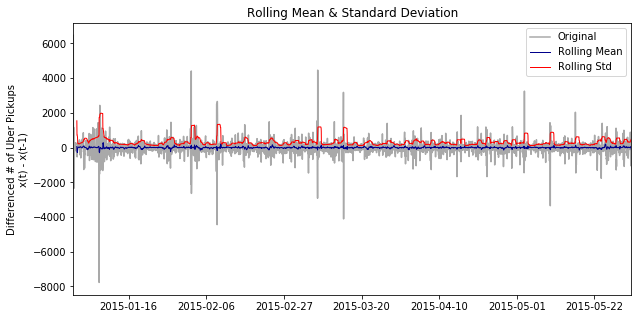

Results of Dickey-Fuller Test:
> ADF Statistic: -18.830
> p-value: 2.022e-30
> Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [81]:
# your code for computing seasonally differenced series and running test_stationarity on that series
diff1 = df15_train.diff().fillna(df15_train)
test_stationarity(diff1.diff(168).fillna(diff1))

## Auto-Correlation Plots
- draw the ACF and PACF plots for the seasonally differenced series
- based on these plots identify the values for p,q,d for an ARIMA model

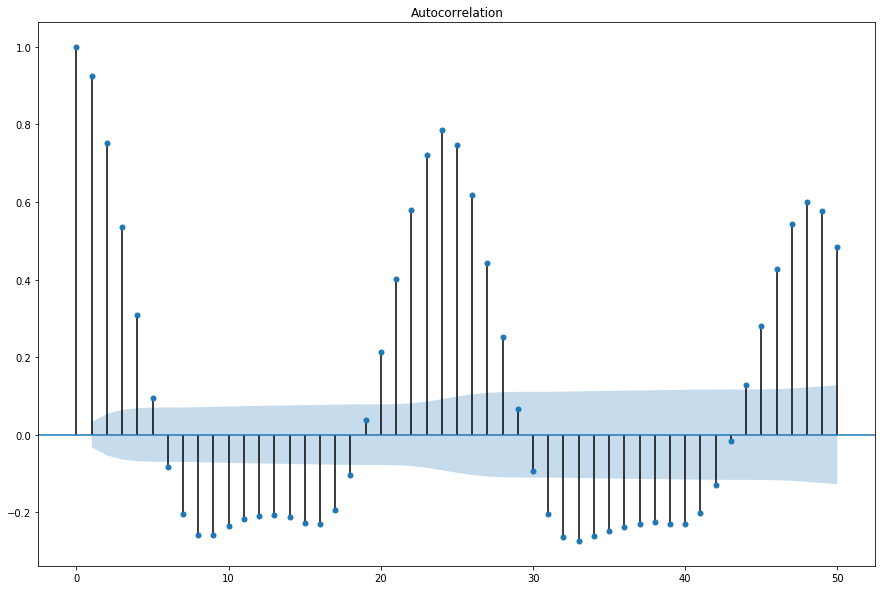

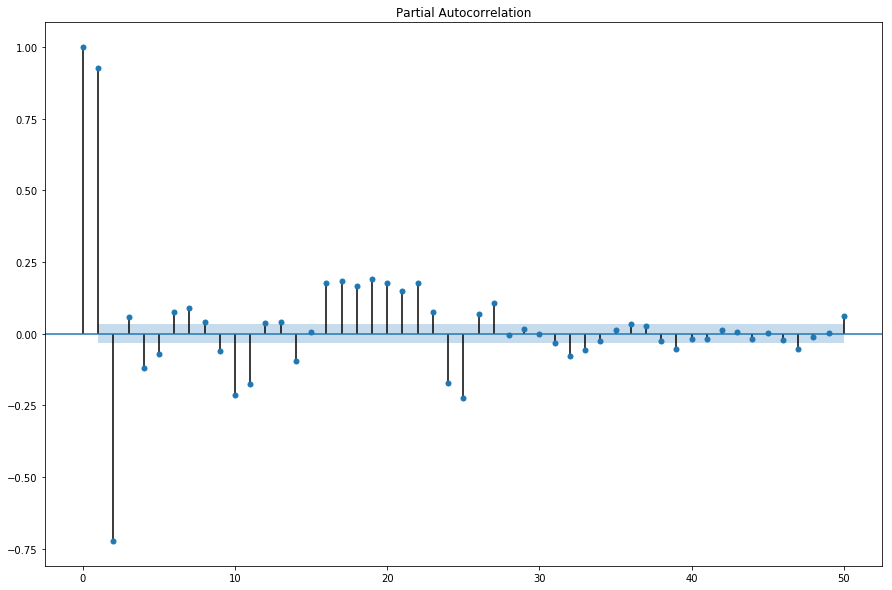

In [83]:
# your code for the acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df15_train,lags=50)
plot_pacf(df15_train,lags=50)
pass

## Seasonal ARIMA models
Typically, we would be able to use a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model as a baseline forecaster. However, because of its implementation in statsmodels, it does not perform well for series with very long seasonal lags (168 in this case - 1 week). Therfore, we'll use the seasonal_decompose method to gain additional insights into the timeseries and use a SARIMAX model with a seasonal lag of 24 (1 day) but not optimize it further.

- use the seasonal_decompose function from statsmodels.tsa.seasonal to decompose the training data series (dat/hour, number of pickups) with a period of 168.
- use the .plot() function to plot the components

You should get a plot like the one below:
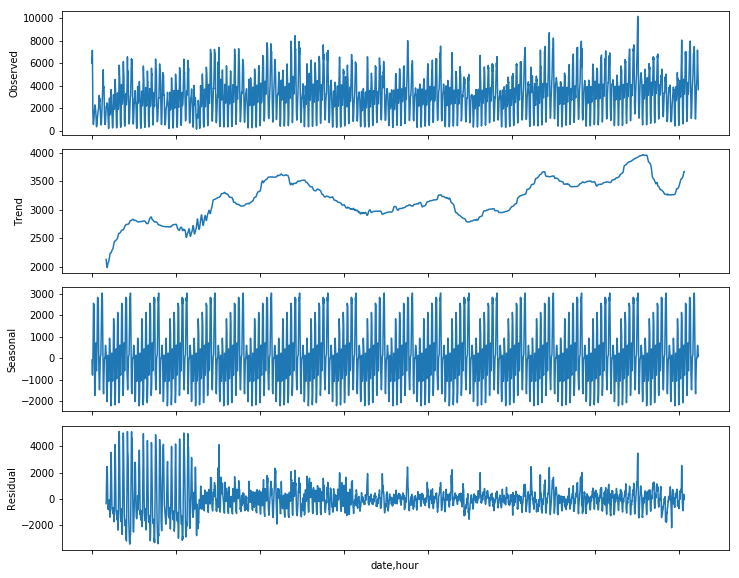

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax

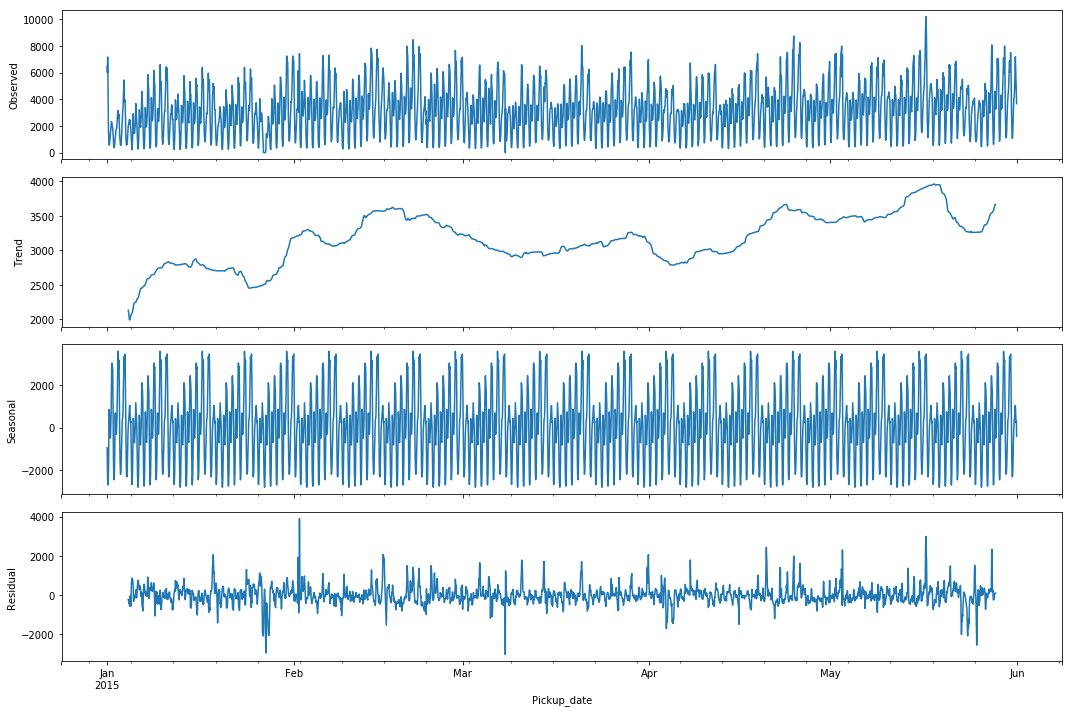

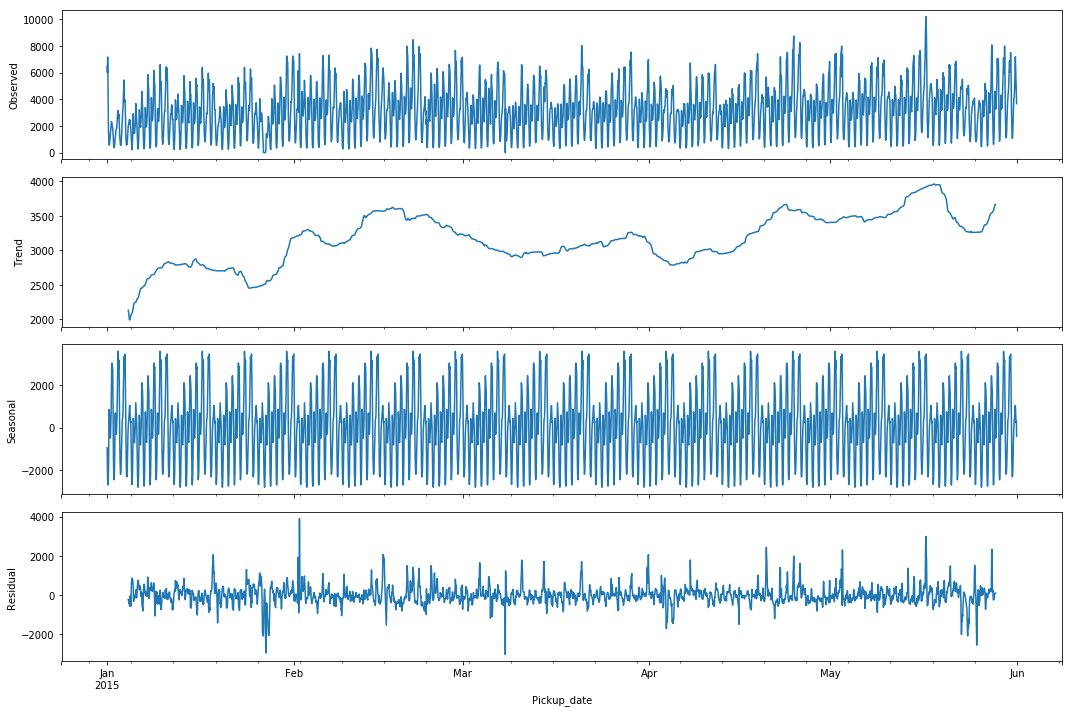

In [85]:
# your code for seasonal_decompose of the training time series
seasonal_decompose(df15_train,freq=168).plot()

## Create SARIMAX model on training data
- ARIMA order: (p,d,q)
- seasonal order: (2,1,1,24)
Call sarimax.SARIMAX() with the training data time series and the appropriate orders.

In [86]:
# your code for creating the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df15_train, order=(24, 1, 0),seasonal_order=(2, 1, 1, 24))
result = model.fit()


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  Statespace Model Results                                 
Dep. Variable:                               count   No. Observations:                 3624
Model:             SARIMAX(24, 1, 0)x(2, 1, 1, 24)   Log Likelihood              -26170.663
Date:                             Mon, 10 Dec 2018   AIC                          52397.325
Time:                                     20:51:57   BIC                          52570.601
Sample:                                 01-01-2015   HQIC                         52459.078
                                      - 05-31-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3396      0.009     39.629      0.000       0.323       0.356
ar.L2         -0.1133      

In [87]:
pred = result.get_forecast(steps=24*30)


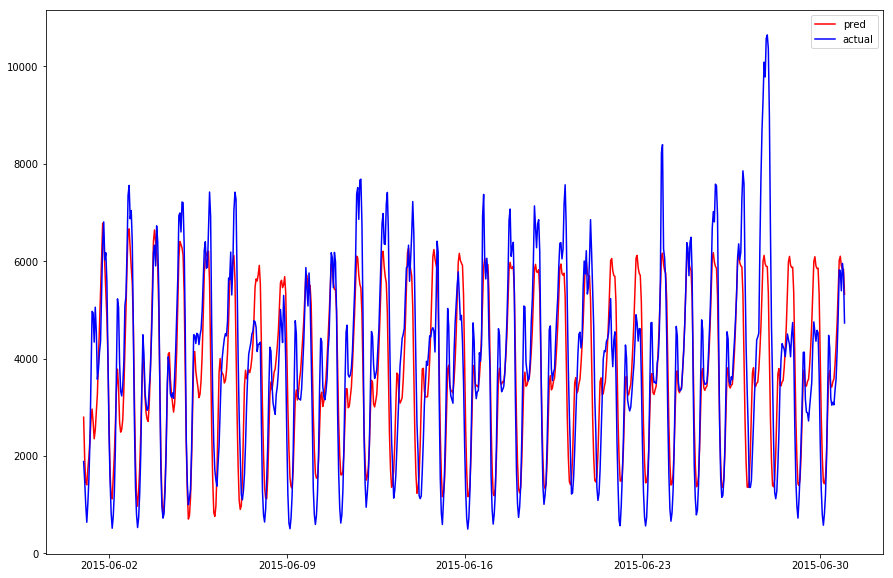

In [92]:
pred_point = pred.predicted_mean
plt.plot(pred_point, color='red')
plt.plot(df15_test, color='blue')
plt.legend(['pred','actual'])

## Forecasting with the SARIMAX model
- set predict_steps to be 24*30 (30 days of 24 hours each)
- make the forecast on the test data with the  model using the .forecast() with keyword argument steps = predict_steps
- calculate the root mean squared error between the forecast and the actual values in the test data
- plot the forecast and the true values in a plot as shown below.

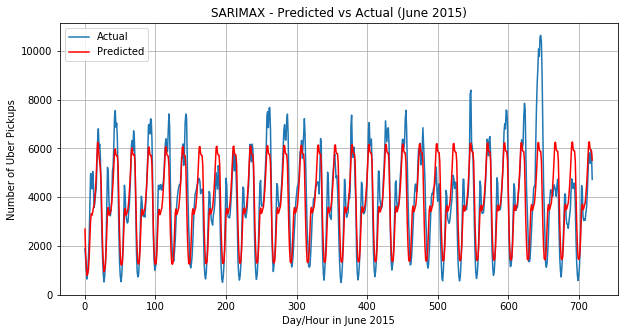

## Facebook Prophet
For the next model, we will use Facebook's open source forecasting package named Prophet. Its method calls are similar to sklearn, when it comes to fitting and predicting. It's a quick way to generate forecasts without too many extraneous features.

In [94]:
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'

## Creating time series in Prophet format
- make sure you turn the training data into a date field with date+hour and call that column 'ds'. Rename the pickup counts field as 'y'

In [3]:
# your code to turn the training time series into Prophet format
df15_train_frame = df15_train.to_frame()
df15_train_frame['ds'] = df15_train_frame.index.tolist()
df15_train_frame['y'] = df15_train_frame['count']

## Fitting time series to Prophet
- set up a Prophet model with seasonality = False
- fit that model on the training series

In [4]:
# your code to fit the series
model = Prophet()
model.fit(df15_train_frame)


## Forecasting
- make a future frame using .make_future_dataframe(periods=720, freq='H')
- construct the forecast using the model
- plot the forecast using the .plot() function associated with the model, with forecast as a argument.

Your plot should look like:
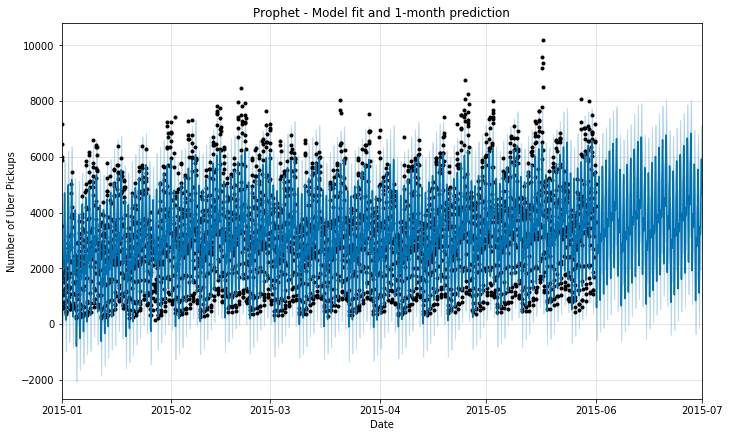

In [ ]:
# your code here for forecasting
future = model.make_future_dataframe(periods = 720, freq='H')
forecast = model.predict(future)

In [ ]:
model.plot(forecast)
pass

## Plot forecast components
- use m.plot_components(forecast) to see the decomposition of the forecast into weekly and hourly trends

In [5]:
# your code here for plotting forecast components
model.plot_components(forecast)
pass

## Evaluating the forecast
- compare forecast to test series
- plot the two series and comment on them
- The prediction seems to always be very safe. It does not tend toward the extremes, and the actual values are almost always higher than the predicted highs and lower than the predicted lows.

Your plot should look like:
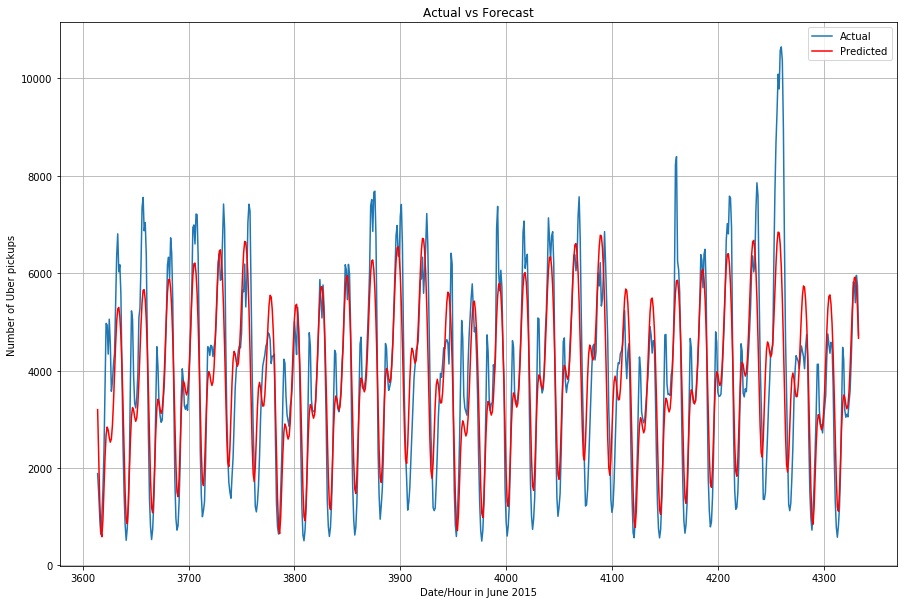

In [6]:
# your code for evaluating forecasts

In [ ]:
plt.plot(forecast['yhat'].tolist()[-720:], c='red')
plt.plot(df15_test.tolist())